In [3]:
import numpy as np
from PIL import Image # Python Imaging Library - For operations like: Image open, resize image, etc..
from IPython.display import Image as show_image  # For displaying our test images to you
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input, decode_predictions

In [4]:
# Let's load our image and rescale it to the resolution of 299x299 which InceptionResNetV2 requires..
img = Image.open("plane.jpg").resize((299,299))


In [5]:
# We must convert it to array for operations...
img = np.array(img)

In [6]:
# Let's look it's shape..
img.shape

(299, 299, 3)

In [7]:
print(img.ndim)

3


In [8]:
img


array([[[ 55, 131, 221],
        [ 49, 125, 221],
        [ 45, 124, 224],
        ...,
        [ 57, 145, 243],
        [ 53, 141, 239],
        [ 51, 139, 237]],

       [[ 53, 128, 220],
        [ 48, 124, 220],
        [ 44, 123, 223],
        ...,
        [ 56, 144, 242],
        [ 54, 142, 240],
        [ 52, 140, 238]],

       [[ 53, 129, 221],
        [ 49, 125, 222],
        [ 45, 124, 225],
        ...,
        [ 55, 143, 241],
        [ 54, 142, 240],
        [ 54, 142, 240]],

       ...,

       [[ 68, 157, 249],
        [ 69, 158, 250],
        [ 70, 159, 250],
        ...,
        [125, 198, 251],
        [126, 199, 254],
        [123, 196, 253]],

       [[ 68, 157, 249],
        [ 69, 158, 250],
        [ 70, 159, 251],
        ...,
        [129, 200, 252],
        [129, 200, 254],
        [126, 197, 253]],

       [[ 68, 157, 249],
        [ 69, 158, 250],
        [ 70, 159, 251],
        ...,
        [131, 202, 254],
        [131, 202, 255],
        [128, 199, 254]]

In [9]:
# We have to add an extra dimension to our array so we will reshape it.. 
img = img.reshape(-1,299,299,3)   # with reshape(-1,..) I'm adding 1 extra dimension..
                                  # I do this because my model requires 4 dim array!

In [10]:
# Let's look it's shape..
img.shape


(1, 299, 299, 3)

In [11]:
print(img.ndim)

4


In [12]:
img

array([[[[ 55, 131, 221],
         [ 49, 125, 221],
         [ 45, 124, 224],
         ...,
         [ 57, 145, 243],
         [ 53, 141, 239],
         [ 51, 139, 237]],

        [[ 53, 128, 220],
         [ 48, 124, 220],
         [ 44, 123, 223],
         ...,
         [ 56, 144, 242],
         [ 54, 142, 240],
         [ 52, 140, 238]],

        [[ 53, 129, 221],
         [ 49, 125, 222],
         [ 45, 124, 225],
         ...,
         [ 55, 143, 241],
         [ 54, 142, 240],
         [ 54, 142, 240]],

        ...,

        [[ 68, 157, 249],
         [ 69, 158, 250],
         [ 70, 159, 250],
         ...,
         [125, 198, 251],
         [126, 199, 254],
         [123, 196, 253]],

        [[ 68, 157, 249],
         [ 69, 158, 250],
         [ 70, 159, 251],
         ...,
         [129, 200, 252],
         [129, 200, 254],
         [126, 197, 253]],

        [[ 68, 157, 249],
         [ 69, 158, 250],
         [ 70, 159, 251],
         ...,
         [131, 202, 254],
        

In [13]:
# I will scale input pixels between -1 and 1 using my model's preprocess_input
# InceptionResNetV2 model requires it..
img = preprocess_input(img)   

In [14]:
img

array([[[[-0.5686275 ,  0.02745104,  0.73333335],
         [-0.6156863 , -0.01960784,  0.73333335],
         [-0.64705884, -0.02745098,  0.75686276],
         ...,
         [-0.5529412 ,  0.13725495,  0.90588236],
         [-0.58431375,  0.10588241,  0.8745098 ],
         [-0.6       ,  0.09019613,  0.85882354]],

        [[-0.58431375,  0.00392163,  0.7254902 ],
         [-0.62352943, -0.02745098,  0.7254902 ],
         [-0.654902  , -0.03529412,  0.7490196 ],
         ...,
         [-0.56078434,  0.12941182,  0.8980392 ],
         [-0.5764706 ,  0.11372554,  0.88235295],
         [-0.5921569 ,  0.09803927,  0.8666667 ]],

        [[-0.58431375,  0.01176476,  0.73333335],
         [-0.6156863 , -0.01960784,  0.7411765 ],
         [-0.64705884, -0.02745098,  0.7647059 ],
         ...,
         [-0.5686275 ,  0.12156868,  0.8901961 ],
         [-0.5764706 ,  0.11372554,  0.88235295],
         [-0.5764706 ,  0.11372554,  0.88235295]],

        ...,

        [[-0.46666664,  0.2313726 ,  0

In [15]:
incresv2_model = InceptionResNetV2(weights='imagenet', classes=1000)   # InceptionResNetV2 will classify images into one of 
                                                                       # 1,000 possible categories.

In [16]:
# Now look at it's layers:
print(incresv2_model.summary())
print(type(incresv2_model))


Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
________________________________________________________________________________

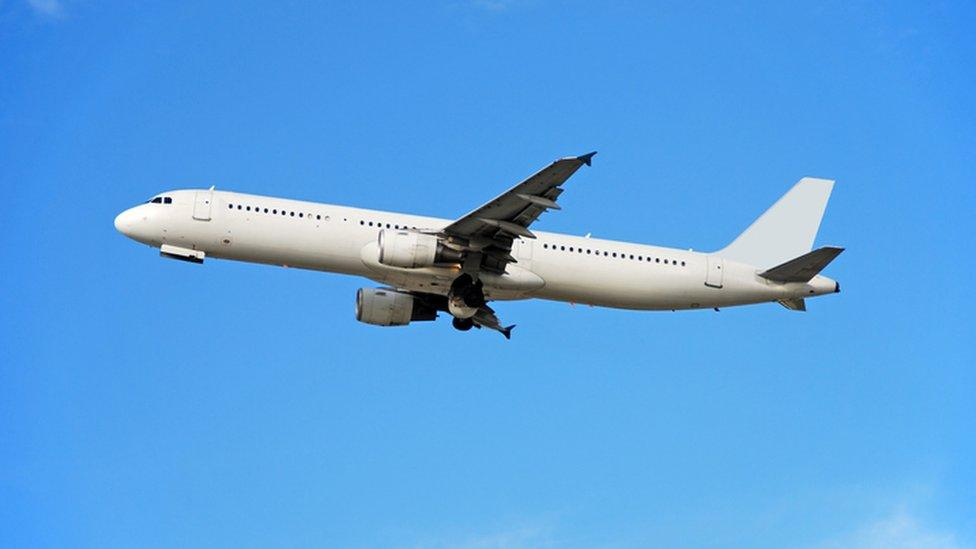

In [17]:
# Before prediction let's see our image with our eyes first:
show_image(filename='plane.jpg') 

In [18]:
preds = incresv2_model.predict(img)
print('Predicted categories:', decode_predictions(preds, top=2)[0]) # decode the results into a list of tuples 

Predicted categories: [('n02690373', 'airliner', 0.838362), ('n04592741', 'wing', 0.072969764)]
